In [1]:
import os
import cv2
import glob
from glob import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from multiprocessing import Pool, cpu_count
from PIL import ImageFilter, ImageStat, Image, ImageDraw
from IPython.display import display

In [2]:
def showX(X, dim):
    int_X = X
    if X.shape == 3:
        int_X_reshape = int_X.reshape(-1,dim,dim,3).swapaxes(0,1).reshape(dim,-1,3)
    else:
        int_X_reshape = int_X
    display(Image.fromarray(int_X_reshape))

In [108]:
image = np.load('image.npy')

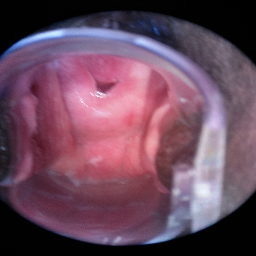

In [109]:
dim = 256
showX(image, dim)

In [110]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

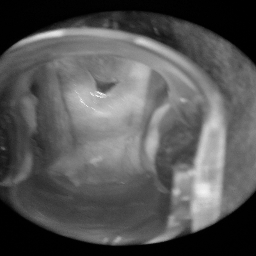

In [111]:
showX(gray, dim)

In [112]:
_, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

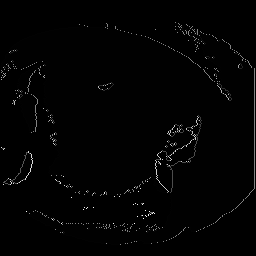

In [113]:
showX(im2, dim)

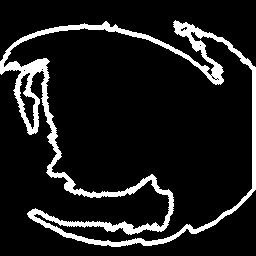

In [114]:
main_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0] 
ff = np.zeros((gray.shape[0], gray.shape[1]), 'uint8') 
ff = cv2.drawContours(ff, main_contour, -1, (255, 255, 255), 3)
showX(ff, dim)

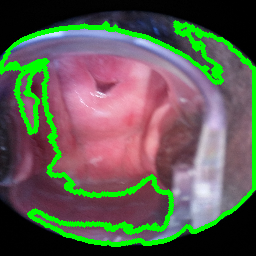

In [115]:
showX(cv2.drawContours(image, main_contour, -1, (0, 255, 0), 3), dim)

# 不同強度

# 100

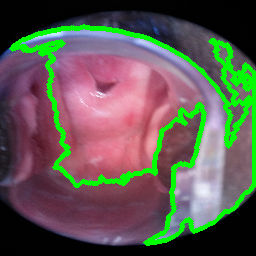

In [101]:
image = np.load('image.npy')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
main_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0] 
ff = np.zeros((gray.shape[0], gray.shape[1]), 'uint8') 
ff = cv2.drawContours(ff, main_contour, -1, (255, 255, 255), 3)
showX(cv2.drawContours(image, main_contour, -1, (0, 255, 0), 3), dim)

# 120

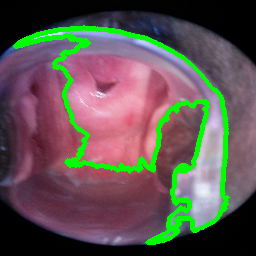

In [102]:
image = np.load('image.npy')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
main_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0] 
ff = np.zeros((gray.shape[0], gray.shape[1]), 'uint8') 
ff = cv2.drawContours(ff, main_contour, -1, (255, 255, 255), 3)
showX(cv2.drawContours(image, main_contour, -1, (0, 255, 0), 3), dim)

# 10

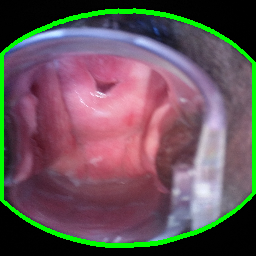

In [103]:
image = np.load('image.npy')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
main_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0] 
ff = np.zeros((gray.shape[0], gray.shape[1]), 'uint8') 
ff = cv2.drawContours(ff, main_contour, -1, (255, 255, 255), 3)
showX(cv2.drawContours(image, main_contour, -1, (0, 255, 0), 3), dim)

# 強度 80 為例子

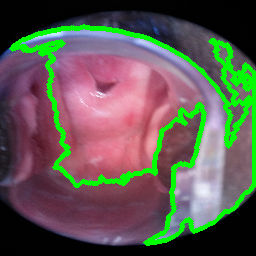

In [139]:
image = np.load('image.npy')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
main_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0] 
ff = np.zeros((gray.shape[0], gray.shape[1]), 'uint8') 
ff = cv2.drawContours(ff, main_contour, -1, (255, 255, 255), 3)
showX(cv2.drawContours(image, main_contour, -1, (0, 255, 0), 3), dim)

# 下一步找出圍出邊界的最大長方形

## 用  Largest Rectangle in Histogram Algorithm

http://www.cnblogs.com/lichen782/p/leetcode_Largest_Rectangle_in_Histogram.html

# 首先填補圍繞的區域

In [140]:
ff_mask = np.zeros((gray.shape[0] + 2, gray.shape[1] + 2), 'uint8')
ff = cv2.floodFill(ff, ff_mask, (int(gray.shape[1]/2), int(gray.shape[0]/2)), 200)

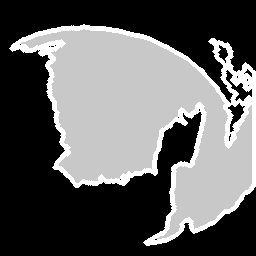

In [145]:
showX(ff[1], dim)

# 找出最大長方形

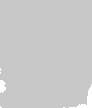

In [150]:
rect = maxRect(ff[1])
rectangle = [min(rect[0],rect[2]), max(rect[0],rect[2]), min(rect[1],rect[3]), max(rect[1],rect[3])]
img_crop = ff[1][rectangle[0] : rectangle[1],rectangle[2] : rectangle[3]]
showX(img_crop,dim)

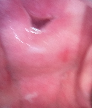

In [152]:
image = np.load('image.npy')
rect = maxRect(ff[1])
rectangle = [min(rect[0],rect[2]), max(rect[0],rect[2]), min(rect[1],rect[3]), max(rect[1],rect[3])]
img_crop = image[rectangle[0] : rectangle[1],rectangle[2] : rectangle[3]]
showX(img_crop,dim)

# 包成函數

In [137]:
def cropCircle(img, resize):
    
    if(img.shape[0] > img.shape[1]):
        tile_size = (int(img.shape[1]*256/img.shape[0]), 256)
    else:
        tile_size = (256, int(img.shape[0]*256/img.shape[1]))
    
    img = cv2.resize(img, dsize = tile_size)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    _, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
    
    im2, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    main_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0] 
    ff = np.zeros((gray.shape[0], gray.shape[1]), 'uint8') 
    cv2.drawContours(ff, main_contour, -1, (255, 255, 255), 3)
    
    ff_mask = np.zeros((gray.shape[0] + 2, gray.shape[1] + 2), 'uint8')
    cv2.floodFill(ff, ff_mask, (int(gray.shape[1]/2), int(gray.shape[0]/2)), 200)
    
    rect = maxRect(ff)
    rectangle = [min(rect[0], rect[2]), max(rect[0], rect[2]),\
                 min(rect[1], rect[3]), max(rect[1], rect[3])]
    img_crop = img[rectangle[0]:rectangle[1], rectangle[2]:rectangle[3]]
    cv2.rectangle(ff,(min(rect[1],rect[3]),min(rect[0],rect[2])),(max(rect[1],rect[3]),max(rect[0],rect[2])),3,2)
    
    img_ = cv2.rectangle(img, (min(rect[1],rect[3]),
                             min(rect[0],rect[2])),
                        (max(rect[1],rect[3]),
                         max(rect[0],rect[2])), 255, 2)
    img_nocrop_r =  cv2.resize(img_, dsize = (resize, resize))
    img_crop_r =  cv2.resize(img_crop, dsize = (resize, resize))
    
    return img_crop_r, img_nocrop_r #, rectangle, tile_size]

In [117]:
def maxHist(hist):
    maxArea = (0, 0, 0)
    height = []
    position = []
    for i in range(len(hist)):
        if (len(height) == 0):
            if (hist[i] > 0):
                height.append(hist[i])
                position.append(i)
        else: 
            if (hist[i] > height[-1]):
                height.append(hist[i])
                position.append(i)
            elif (hist[i] < height[-1]):
                while (height[-1] > hist[i]):
                    maxHeight = height.pop()
                    area = maxHeight * (i-position[-1])
                    if (area > maxArea[0]):
                        maxArea = (area, position[-1], i)
                    last_position = position.pop()
                    if (len(height) == 0):
                        break
                position.append(last_position)
                if (len(height) == 0):
                    height.append(hist[i])
                elif(height[-1] < hist[i]):
                    height.append(hist[i])
                else:
                    position.pop()    
    while (len(height) > 0):
        maxHeight = height.pop()
        last_position = position.pop()
        area =  maxHeight * (len(hist) - last_position)
        if (area > maxArea[0]):
            maxArea = (area, len(hist), last_position)
    return maxArea    

In [118]:
def maxRect(img):
    # maxArea[0] : area, maxArea[1] : length of hist, maxArea[2] : last_position
    maxArea = (0, 0, 0)
    addMat = np.zeros(img.shape)
    for r in range(img.shape[0]):
        if r == 0:
            addMat[r] = img[r]
            area = maxHist(addMat[r])
            if area[0] > maxArea[0]:
                maxArea = area + (r,)
        else:
            addMat[r] = img[r] + addMat[r-1]
            addMat[r][img[r] == 0] *= 0
            area = maxHist(addMat[r])
            if area[0] > maxArea[0]:
                maxArea = area + (r,)
    #return (int(maxArea[3] + 1 - maxArea[0]/abs(maxArea[1] - maxArea[2])),\
    #        maxArea[2], maxArea[3], maxArea[1], maxArea[0])
    return (int(maxArea[3] + 1 - (maxArea[0]/abs(maxArea[1] - maxArea[2])/255.)),\
            maxArea[2], maxArea[3], maxArea[1], maxArea[0])

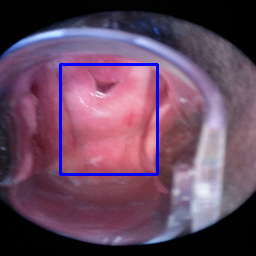

In [138]:
x = cropCircle(img, 256)
showX(x[1][:,:,::-1],dim)

In [154]:
ALL_TRAIN_NOSEGPA_80_128 =\
np.load('/home/Kaggle_Cervical_Cancer_Screening/Rory/Dev-ipynb/resize_data/ALL_TRAIN_NOSEGPA_80_128.npy')

In [155]:
ALL_TRAIN_SEGPA_80_128 =\
np.load('/home/Kaggle_Cervical_Cancer_Screening/Rory/Dev-ipynb/resize_data/ALL_TRAIN_SEGPA_80_128.npy')

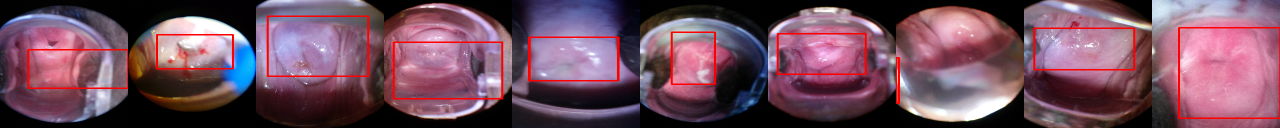

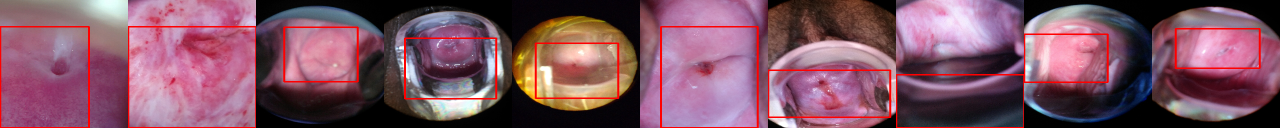

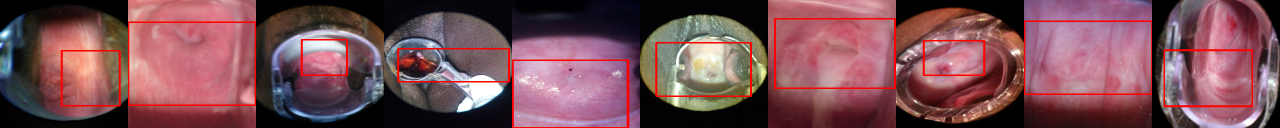

In [162]:
dim = 128
for i in range(0,30,10):
    showX(ALL_TRAIN_NOSEGPA_80_128[i:i+10].reshape(-1,dim,dim,3).swapaxes(0,1).reshape(dim,-1,3), dim)

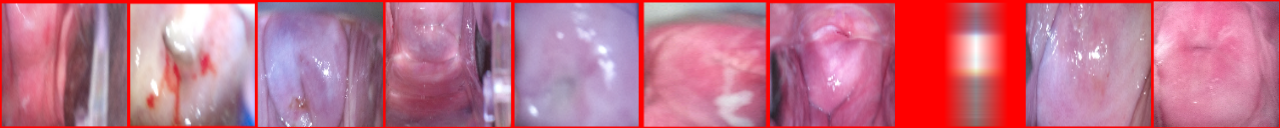

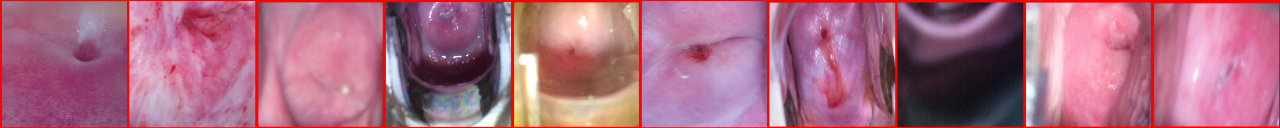

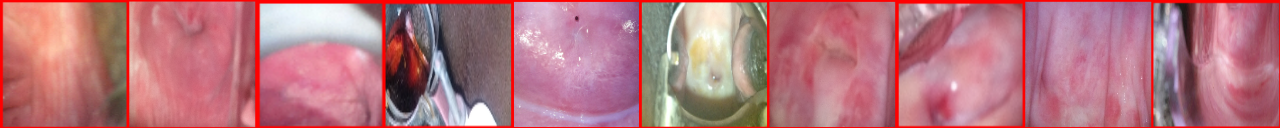

In [163]:
dim = 128
for i in range(0,30,10):
    showX(ALL_TRAIN_SEGPA_80_128[i:i+10].reshape(-1,dim,dim,3).swapaxes(0,1).reshape(dim,-1,3), dim)